passing step ./ad_prof/amp_50_long/HGB.out2.00600.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00650.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00700.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00750.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00800.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00850.athdf
passing step ./ad_prof/amp_50_long/HGB.out2.00900.athdf


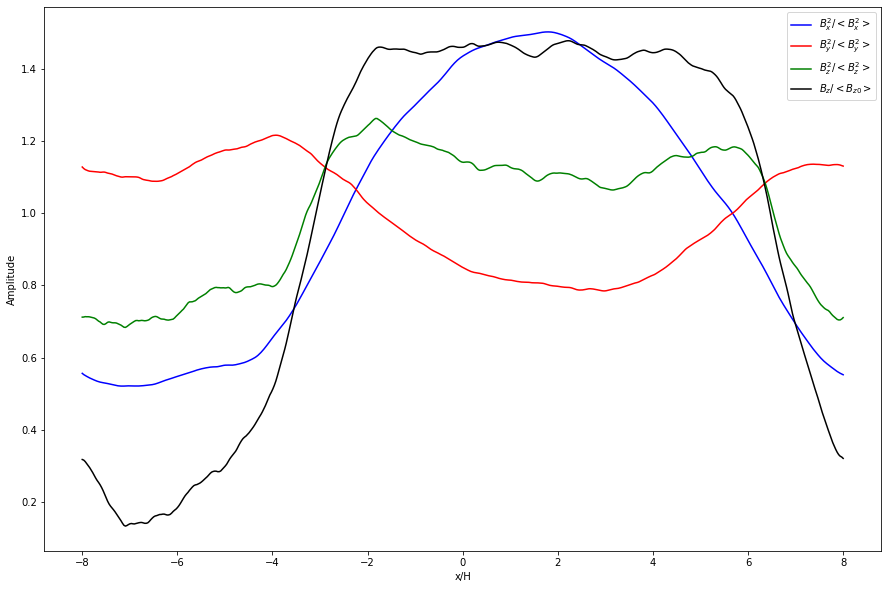

In [3]:
import sys
import time
sys.path.append('~/athena-public-version/vis/python/')
#sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#IMPORT APPROPRIATE ATHINPUT FILE
#import athinput.hgb as athin
import athena_read


def b_over_bavg(file_name):
    #return in order the two y components of b cross v 
    data = []
    data = athena_read.athdf(file_name)
    #print(data)
    #for 8x8x1 scale height box, with cubic cells, needs to be adjusted for other sizes
    side_length = 1/len(data['x3v'])
    #print(side_length,' side length')
    volume = side_length**3
    
    Nx = len(data['x1v'])
    Ny = len(data['x2v'])
    Nz = len(data['x3v'])
    
    #assuming 64x256x256, but should work for any 
    overall_length = Nx*Ny*Nz
    bx = (data['Bcc1'])**2
    by = (data['Bcc2'])**2
    bz = (data['Bcc3'])**2
    bzsqrt = (data['Bcc3'])
    #calculate squared total average 
    bz_avg = (np.sum(bz)/(Nz*Ny*Nx))
    by_avg = (np.sum(by)/(Nz*Ny*Nx))
    bx_avg = (np.sum(bx)/(Nz*Ny*Nx))
    #calculate radial avg profil
    bz = np.sum(bz,axis=(0,1))/(Nz*Ny)
    by = np.sum(by,axis=(0,1))/(Nz*Ny)
    bx = np.sum(bx,axis=(0,1))/(Nz*Ny)
    bzsqrt = np.sum(bzsqrt,axis=(0,1))/(Nz*Ny)
    
    #initial bz squared, set by plasma beta
    Bzsquared0 = 2/400
    Bz0= np.sqrt(Bzsquared0)
    #divide by average value over whole box
    bz_over_bavg = bz/bz_avg
    bx_over_bavg = bx/bx_avg
    by_over_bavg = by/by_avg
    bz_over_Bz0 = bzsqrt/Bz0
    return bx_over_bavg,by_over_bavg,bz_over_bavg,bz_over_Bz0 #top right figure 3 zonal flow paper (2014)
bxob_total =[]
byob_total =[]
bzob_total =[]
bzobz0_total =[]
for i in range(600,922):
    #file_name= ('./ad_prof/amp_50_long/HGB.out2.008'+str(i)+'.athdf')
    file_name= ('./ad_prof/amp_50_long/HGB.out2.00%03d.athdf'%i)
    bxob,byob,bzob,bzobz0 = b_over_bavg(file_name)
    if i%50==0:
        print('passing step',file_name)
    #append to arrays
    bxob_total.append(bxob)
    byob_total.append(byob)
    bzob_total.append(bzob)
    bzobz0_total.append(bzobz0)
#convert to numpy
bxob_total=np.array(bxob_total)
byob_total=np.array(byob_total)
bzob_total=np.array(bzob_total)
bzobz0_total=np.array(bzobz0_total)
#take mean 
bxob = np.array([np.mean(k) for k in zip(*bxob_total)])
byob = np.array([np.mean(k) for k in zip(*byob_total)])
bzob = np.array([np.mean(k) for k in zip(*bzob_total)])
bzobz0 = np.array([np.mean(k) for k in zip(*bzobz0_total)])
x_arr=np.linspace(-8,8,512)

#plotting section
plt.figure(figsize=(15,10))
plt.plot(x_arr,bxob,c='b',label='$B_x^2/<B_x^2>$')
plt.plot(x_arr,byob,c='r',label='$B_y^2/<B_y^2>$')
plt.plot(x_arr,bzob,c='g',label='$B_z^2/<B_z^2>$')
plt.plot(x_arr,bzobz0,c='k',label='$B_z/B_{z0}$')
plt.xlabel('x/H')
plt.ylabel('Amplitude')

plt.legend()